LR With 1 variable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
data=pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [96]:
x=data[['ENGINESIZE','CYLINDERS']]
x.head()


,ENGINESIZE,CYLINDERS
0,2.0,4
1,2.4,4
2,1.5,4
3,3.5,6
4,3.5,6


In [97]:
Y=data[['CO2EMISSIONS']]
Y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


ValueError: x and y must be the same size

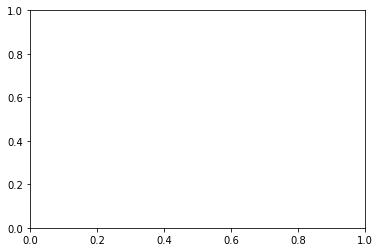

In [98]:
plt.scatter(x,Y)
plt.xlabel("X")
plt.ylabel("Y")

# initilizeing parameters

In [99]:
m=x.shape[0]
print(m)
a=np.ones((m,1))
#print(a)
x['ones']=a
print(x.shape)
theta=np.zeros((x.shape[1],1))
print(theta.shape)
print(x.shape[1]==theta.shape[0])

1067
(1067, 3)
(3, 1)
True


<ipython-input-99-0e7c339e0cea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['ones']=a


# predictions 

In [101]:
def predict(x,theta):
    predictions = np.dot(x,theta)
    return predictions
#predictions[0:5]

# compute cost

In [102]:
def compute_cost(x,y,theta):
    m=x.shape[0]
    J=0
    predcitons=predict(x,theta)
    squareError = np.power(predcitons-y,2)
    J=(1/2*m)*(np.sum(squareError))
    return J
    

#  Gradient desent

In [103]:
def gradientDesent(x,y,theta,alpha,num_inters):
    
    J_history=np.zeros((num_inters,1))
    for i in range(1,num_inters+1):
        error = np.dot(x,theta)-y;
        theta= theta-((alpha/m)*(np.dot(x.T,error)))
        #print(error.shape)
        #print(theta.shape)
        #print((np.dot(x.T,error)).shape)
        if i%100==0:
            print(compute_cost(x,y,theta))

        J_history = compute_cost(x, y, theta)
    return theta    


In [107]:
theta = gradientDesent(x,Y,theta,0.001,2000)
compute_cost(x,Y,theta)

CO2EMISSIONS    5.535985e+08
dtype: float64
CO2EMISSIONS    5.532047e+08
dtype: float64
CO2EMISSIONS    5.528154e+08
dtype: float64
CO2EMISSIONS    5.524306e+08
dtype: float64
CO2EMISSIONS    5.520501e+08
dtype: float64
CO2EMISSIONS    5.516739e+08
dtype: float64
CO2EMISSIONS    5.513020e+08
dtype: float64
CO2EMISSIONS    5.509344e+08
dtype: float64
CO2EMISSIONS    5.505709e+08
dtype: float64
CO2EMISSIONS    5.502115e+08
dtype: float64
CO2EMISSIONS    5.498562e+08
dtype: float64
CO2EMISSIONS    5.495050e+08
dtype: float64
CO2EMISSIONS    5.491578e+08
dtype: float64
CO2EMISSIONS    5.488145e+08
dtype: float64
CO2EMISSIONS    5.484751e+08
dtype: float64
CO2EMISSIONS    5.481395e+08
dtype: float64
CO2EMISSIONS    5.478078e+08
dtype: float64
CO2EMISSIONS    5.474799e+08
dtype: float64
CO2EMISSIONS    5.471556e+08
dtype: float64
CO2EMISSIONS    5.468351e+08
dtype: float64


CO2EMISSIONS    5.468351e+08
dtype: float64

In [108]:
from sklearn.metrics import r2_score
y_predict=predict(x,theta)
print('R2-score: %.2f' % r2_score(y_predict, Y))


R2-score: 0.73


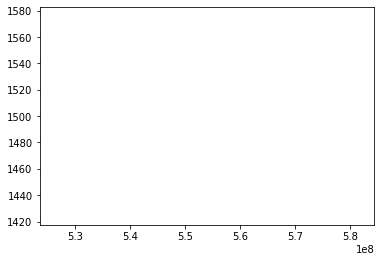

In [106]:

num_iteration=1500
plt.plot(compute_cost(x,Y,theta),num_iteration,color='r')
plt.show()